In [7]:
import requests
import geopandas as gpd

# Construct the query URL
query_url = "https://maps.water.noaa.gov/server/rest/services/nwm/srf_18hr_max_high_flow_magnitude/MapServer/0/query"
params = {
    'where': '1=1',
    'outFields': '*',
    'outSR': '4326',  # Specify output spatial reference if needed
    'f': 'geojson',  # Request geojson output
    'returnGeometry': 'true'
}

# Make the request
response = requests.get(query_url, params=params)

# Convert to GeoDataFrame
predictions = gpd.GeoDataFrame.from_features(response.json(), crs="EPSG:4326")

print(predictions.head())


                                            geometry feature_id  \
0  LINESTRING (-68.13710 46.01826, -68.13737 46.0...       1063   
1  LINESTRING (-68.17717 46.02566, -68.17692 46.0...       1443   
2  LINESTRING (-67.93539 45.63326, -67.93529 45.6...       1969   
3  LINESTRING (-68.29317 45.65179, -68.29314 45.6...       3135   
4  LINESTRING (-68.15700 45.78931, -68.15699 45.7...       3673   

                     name  strm_order    huc6 state  nwm_vers  \
0          Unnamed Stream           1  010200    ME         3   
1          Unnamed Stream           1  010200    ME         3   
2          Unnamed Stream           2  010200    ME         3   
3  Little Molunkus Stream           2  010200    ME         3   
4      Wytopitlock Stream           2  010200    ME         3   

            reference_time  max_flow recur_cat  high_water_threshold  \
0  2024-06-25 18:00:00 UTC     38.14         2                  6.97   
1  2024-06-25 18:00:00 UTC     38.14         2                

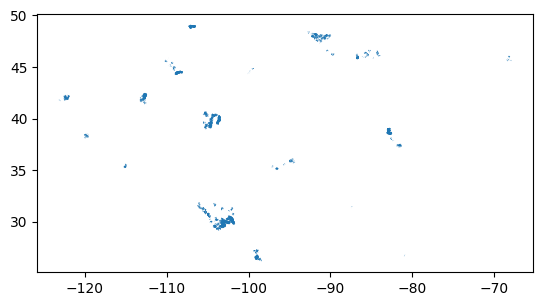

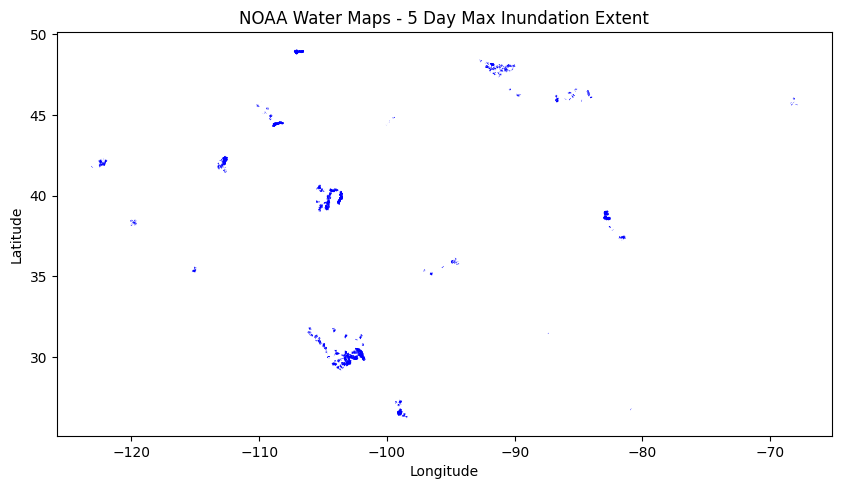

In [8]:
# plot the geodataframe
import matplotlib.pyplot as plt

# Basic Plot
predictions.plot()

# Enhanced Plot
predictions.plot(figsize=(10, 6), color='blue', edgecolor='black')

plt.title('NOAA Water Maps - 5 Day Max Inundation Extent')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [9]:
# Export GeoDataFrame as a Shapefile
predictions.to_file("C:/Users/Lyn/Documents/Programming/Python_codes/CUAHSI Summer Institute 2024/18hr_highflow_test.shp")

C:\Users\Lyn\AppData\Local\Temp\ipykernel_13104\3152235721.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  predictions.to_file("C:/Users/Lyn/Documents/Programming/Python_codes/CUAHSI Summer Institute 2024/18hr_highflow_test.shp")


Import usgs current streamflow data to combine with the flood discharge predictions

In [10]:
# import from the website and save as a csv (comma seperated) in x location

In [ ]:
# read csv
import pandas as pd

# Replace 'path/to/your_file.csv' with the actual file path
usgs = pd.read_csv('C:/Users/Lyn/Documents/Homework/UMass/CUAHSI_2024/forecastdata/streamflow_texas_06252024.csv')

print(df.head())

# Remove the header
usgs.drop(index=range(0, 29), inplace=True)  # Removes the header
print(df.head())

transpose the data into a format that can be fed into handfim

In [21]:
extracted_columns = predictions[['feature_id', 'max_flow']]
transposed_columns = extracted_columns.T

# Specify the datetime string you want to use
new_datetime = '2024-06-25 12:50:32 EDT'

# Rename 'max_flow' to the specified datetime
forecastinput = transposed_columns.rename(index={'max_flow': new_datetime})
print(forecastinput.head())

## export the data to a csv file with the date and time in the filename
# Replace invalid filename characters in new_datetime
filename_datetime = new_datetime.replace(' ', '_').replace(':', '_')
# Format the filename string to include new_datetime
filename = f'forecast_input_{filename_datetime}.csv'
print(filename)
# Export forecastinput as a CSV file with the formatted name
forecastinput.to_csv(filename, sep=',', index=True)


                          0      1      2      3      4      5     6     \
feature_id                1063   1443   1969   3135   3673   3821  3939   
2024-06-25 12:50:32 EDT  38.14  38.14  38.85  41.67  22.25  41.67  1.06   

                          7      8      9     ...    1990    1991    1992  \
feature_id               10952  10958  10988  ...  464338  464340  464346   
2024-06-25 12:50:32 EDT   1.41   1.77   0.71  ...   60.39    0.71    0.35   

                             1993      1994      1995      1996      1997  \
feature_id               12289082  12289084  12289086  12289088  12289090   
2024-06-25 12:50:32 EDT     24.72     24.37      11.3     68.16      0.71   

                             1998      1999  
feature_id               12289094  12289096  
2024-06-25 12:50:32 EDT      11.3     10.59  

[2 rows x 2000 columns]
forecast_input_2024-06-25_12_50_32_EDT.csv
